<a href="https://colab.research.google.com/github/bchiramani/Python/blob/main/IntroductionToTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

# DataSet

The output of our model is a probability of a good roast depending on temperature and duration. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

In [4]:
""" Creates a coffee roasting data set.
    roasting duration: 12-15 minutes is best
    temperature range: 175-260C is best
"""
rng = np.random.default_rng(2)
X = rng.random(400).reshape(-1,2)
X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
Y = np.zeros(len(X))

i=0
for t,d in X:
    y = -3/(260-175)*t + 21
    if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1
Y=Y.reshape(-1,1)


In [5]:
print(X.shape , Y.shape)

(200, 2) (200, 1)


In [9]:
#Plotting the dataset
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
def plt_roast(X,Y):
    Y = Y.reshape(-1,)
    colormap = np.array(['r', 'b'])
    fig, ax = plt.subplots(1,1,)
    ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', facecolors='none', 
               edgecolors=dlc["dldarkblue"],linewidth=1,  label="Bad Roast")
    tr = np.linspace(175,260,50)
    ax.plot(tr, (-3/85) * tr + 21, color=dlc["dlpurple"],linewidth=1)
    ax.axhline(y=12,color=dlc["dlpurple"],linewidth=1)
    ax.axvline(x=175,color=dlc["dlpurple"],linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)",size=12)
    ax.set_ylabel("Duration \n(minutes)",size=12)
    ax.legend(loc='upper right')
    plt.show()

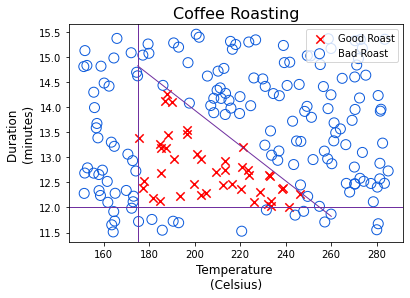

In [10]:
plt_roast(X,Y)

# Normalize Data
fitting the weights to the data is more quickly with normalized data.
We will use the normalization.layer:


1.  create a normalized layer ( not a layer in the model)
2. adapt the data 
3.  normalize the data



In [11]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [12]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)  

(200000, 2) (200000, 1)


# Tensorflow model

In [13]:
tf.random.set_seed(1234)
model=Sequential([
    tf.keras.Input(shape=(2,)),
    # the above instruction specifies the expected shape of the input
    Dense(3,activation='sigmoid', name='layer1'),
    Dense(1,activation='sigmoid',name='layer2')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [15]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


while examening the weights and the biases Tensorflow has instantiated , weh should find that the weights should be of size and the bias b size should match the number of units in the layer
* In the first layer with 3 units, we expect W to have a size of (2,3) and  𝑏  should have 3 elements.
* In the second layer with 1 unit, we expect W to have a size of (3,1) and  𝑏  should have 1 element.

In [16]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08334005 -0.29660565  0.17884266]
 [-0.56124383 -0.15262699  0.8899205 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.4277674 ]
 [-0.88499916]
 [ 0.3626454 ]] 
b2(1,): [0.]


# Compiling and fitting the model

The number of epochs was set to 10. This specifies that the entire data set should be applied during training 10 times

In [17]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 1ms/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0160
Epoch 5/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0104
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0020


# Updating weights

In [18]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.12673463  14.2960005  -11.096159  ]
 [ -8.916374    11.853648    -0.2522399 ]] 
b1: [-11.162888    1.7599403 -12.097789 ]
W2:
 [[-45.71031 ]
 [-42.945232]
 [-50.189915]] 
b2: [26.144835]


In [19]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

# Predictions

Once you have a trained model, you can then use it to make predictions. 

In [20]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

predictions = 
 [[9.6251404e-01]
 [3.0315942e-08]]


To convert the probabilities to a decision, we apply a threshold:

In [21]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]
